# CS-5600/6600 Lecture 4 - Basic Modeling Concepts

**Instructor: Dylan Zwick**

*Weber State University*

References:
* [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/) by Aurélien Géron - [The Machine Learning Landscape](https://github.com/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb)

* [An Introduction to Statistical Learning](https://www.statlearning.com/) - Chapter 1: Introduction

<center>
  <img src="https://imgs.xkcd.com/comics/ai_hiring_algorithm.png" alt="AI Hiring Algorithm from xkcd">
</center>

Today, we're going to discuss some basic concepts in machine learning, specifically around model creation and validation. These ideas are foundational, and will come up constantly in this class, so it's important to have a firm grasp of them from the start.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Types of Machine Learning Systems

There are so many types of machine learning systems that it's useful to classify them into broad categories based on the following criteria:

* How they are *supervised* during training.
* Whether they learn incrementally or "on the fly".
* Whether they work by comparing data points to known data points, or instead detect patterns and make predictions.

These broad categories are not exhaustive, and reasonable arguments can be made for classifying machine learning systems using other, different broad categories. The formal categories and classification rules aren't as important as the concepts underlying them.



### Training Supervision

Training supervision is essentially a measurement of how well we know and have defined the "correct" answer for our training data. This runs the gamut from every instance in our training data having a well defined answer, to there being no clearly defined notion of what a correct answer is.

#### Supervised Learning

Supervised learning is when there is a well-defined "correct" answer for every instance in your training data. For example, suppose you're trying to train a model to identify whether there's a cat in an image. Your training data could consist of tens of thousands of images that human beings have looked at and labeled. Each of these images would then have an answer to the "cat or not" question, and the goal of the model would be to learn how to correctly predict these answers.

#### Unsupervised Learning

Unsupervised learning, as you might guess, is when there's *not* a well-defined "correct" answer for every instance in your training data. In fact, a "correct" answer might not even be a well-defined concept.

For example, every living creature on this planet is categorized according to a system of 7 [taxonomic ranks](https://en.wikipedia.org/wiki/Taxonomic_rank). These ranks are, in increasing specifity, *Kingdom*, *Phylum*, *Class*, *Order*, *Family*, *Genus*, *Species*. A pneumonic to remember these is "King Phillip Came Over From Germany Smiling". The categorization of human beings is:

<center>

Kingdom - Animalia (Animal)

Phylum - Chordata (Chordate)

Class - Mamalia (Mammal)

Order - Primates

Class - Hominidae (Hominid)

Genus - Homo

Species - Sapiens
</center>

But the thing is, outside of (perhaps) species, none of these categories are empirical. In other words, that there are seven levels instead of six or eight is just a decision biologists made, as are the different types within each level, and whether a species belongs in that type. There's no objective reason why there couldn't be more levels, or more types. It's just a call people have made that seems sensible.

This is an examples of something called *clustering*, and in this case *hierarchical clustering*. Training an algorithm to do clustering is an example of *unsupervised* learning. There's no objective right answer - we're just looking for something that seems to make sense.

Another, perhaps less ambitious, example of clustering is suppose you worked for an online retailer, and you wanted to create hierarchical categories for your customers. Maybe some of these categories are "weekend warrior dads", "first-time mothers", and "urban socialites". These categories can be useful for, say, marketing purposes, and it might be nice if you could have an algorithm that could examine all your customers and create these categories on their own.

#### Semi-Supervised Learning

The idea behind semi-supervised learning is that *some* of the data, but not all, is labeled, and you use both the labeled *and* unlabeled data to make predictions.

For example, on Google Photos, when you upload a bunch of photos to it, it will analyze the pictures and determine the same person appears in multiple photos, but won't know the name of that person. Then, if you come in and label that person, it will update that (human provided) label to all the pictures it thinks are also of that person.

Most semi-supervised learning algorithms are combinations of unsupervised and supervised algorithms. In the image below, you might have a semi-supervised algorithm that categorizes into two classes (triangle and square). If we just try to classify a new instance (represented by the cross) using the labeled data, it would go with a square, as its closer to the squares. However, using the unlabeled data as well, it could detect the cross is in the triangle cluster, and classify it accordingly.
<img src="https://drive.google.com/uc?export=view&id=1YnSzt0lMT3eUo_ExehdfldU6L7e6amMz" alt="Semi-Supervised Learning">

#### Self-supervised learning

Self-supervised learning is when a fully labeled dataset is created from an unlabeled one. For example, if you have a large dataset of unlabeled images, you can randomly mask a small part of each image and then train a model to recover the original image. During training, the masked images are used as the inputs, and the original images are used as labels.

This is the idea behind Adobe Photoshop's "generative fill", which can sometimes produce impressive results, sometimes strange but interesting results, and sometimes comically bad results.

For example, here are some expansions it created for popular album covers.

Nirvana's "Nevermind", which is pretty good, although that shark is a bit scary:

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*shVZ6w5q7i2a0OHb4Sn8NA.jpeg" alt="Nirvana Nevermind">


The Beatle's "Abbey Road", which is pretty trippy but also kind of cool. How did it know to put in a yellow submarine?

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*fAc_Pl7Q9r-5PhLjqy6DnQ.jpeg" alt="Abbey Road">

Here's Metallica's "Master of Puppets". Piece of cake.

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*fX3GhJM8z_WWETHDky3Hmw.jpeg" alt="Master of Puppets">

Finally, my favorite - Katy Perry's "Teenage Dream", featuring what is either a miniature Katy Perry, or a gigantic housecat.

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*M8jp59Nn-Dm9M5B3qEQ0LQ.jpeg" alt="Teenage Dream">

Some argue that self-supervised learning is a type of unsupervised learning, as it begins with unlabeled data. However, the training is done on fully labeled datasets, so most would consider it a type of supervised learning.

#### Reinforcement Learning

*Reinforcement learning* is a very different type of learning from the ones we've talked about so far. Here, the learning system is called an *agent*, and it makes decisions within its environment. There is a corresponding metric (either a *reward* or a *penalty*, which are really just two flavors of the same thing), and it tries to make the decision that optimizes this metric. The method by which the agent makes its decision is its *policy*, and it tries to figure out an optimal policy for its various environments.

Reinforcement learning is typically what is used to teach a computer how to play a board  game. What the computer typically does is it plays itself using two different policies, finds the policy that wins (the reward), and then innovates around the winning policy. This is the approach that has made computers better than people at Checkers, Othello, Chess, Stratego, Go, and pretty much every board game out there.

It's also the approach used, for example, by stabalization systems in flying drones.

### Batch vs. Online Learning

Another criterion used to classify machine learning systems is whether the system can learn incrementally from a stream of incoming data.

#### Batch Learning

With *batch learning* the system is incapable of learning incrementally and must be trained using all the available data. This will generally take a lot of time and resources, so it is typically done *offline* (not in production).

Unfortunatyl, a model's performance tends to decay over time, simply because the world contisues to evolve while the model remains unchanged. Some terms for this are "data drift" or the harsher sounding "model rot". Sometimes this decay is slow - it probably takes a while before innovations in Chess become commonplace. Other times it can be quite rapid - a model that predicts the stock market tends to lose any advantage it has quite quickly.

If you want a batch learning system to know about new data, you need to train a new version from scratch on a full dataset. This process can be automated fairly easily, but it can still require many hours and significant resources. This can be a problem if you need it to respond quickly, compute is expensive, or other resources like memory are scarce.

Generally speaking, if it's possible it's best to have a system that can learn incrementally - an *online* system.

#### Online Learning

With *online learning* you train a system incrementally by feeding it data instances sequentially, either one at a time or in groups called *mini-batches*. Each learning step is fast and cheap, so the system can learn about new data on the fly as it arrives.

This approach is useful for systems that need to quickly adapt to change, systems with limited resources, or systems where the amount of data is so huge it's impossible to ingest all at once.

One important parameter of online learning systems is how fast they adapt to changing data. This is usually called the *learning rate*. This learning rate is typically a parameter that is set for - and not learned by - your algorithm. As such, it's an example of what we call a *hyperparameter*.

### Instance-Based Versus Model-Based Learning

One final way to categorize machine learning systems is by how the *generalize*. In other words, how they handle data that's outside their training set and that they haven't seen before.

Most machine learning tasks are about making predictions. This means that given a number of training examples, the system needs to be able to make good predictions for instances it's never seen before. Having a good performance measure on the training data is nice, but that's not really the goal. The goal is to perform well in the "real world".

There are two main approaches to generalization - instance-based learning and model-based learning.

#### Instance-based Learning

Perhaps the most trivial way of *learning* is to just mimic the training data. If you were to build a spam filter this way, it would just flag all emails that are identical to emails that have already been flagged a spam. Not the absolute worst solution, but not a very good one.

A better (although probably still not great) model would be one that also filters emails that are very similar to the ones already marked as spam. This requires a *measure of similarity* between two emails. Once you have that measure of similarity, the model could just find the most similar emails from its training data, and if that email in the training data is spam, the new email would be filtered.

This is called *instance-based learning*.

#### Model-Based Learning

Another way to generalize from a set of examples is to build a model from the examples in the training data and then use this model to make predictions.

This tends to be a much more powerful approach, and it will be the approach we focus on for almost everything we do in this class.

## Challenges of Machine Learning

Now that we've seen some of the basic types of machine learning scenarios, let's talk about some of the general problem you'll run into when you're trying to build your machine learning models.

### Insufficient Quantity of Data

It typically takes a lot of data for most machine learning algorithms to work properly - even for apparently simple problems you typically need thousands of examples, and for complex problems you may need millions. If you don't have enough data it can be essentially impossible to build a good model, and acquiring data isn't always easy or cheap.

In a [famous paper](https://aclanthology.org/P01-1005/) published in 2001, Microsoft researchers Michele Banko and Eric Brill showed that very different machine learning algorithms, including fairly simple ones, performed almost identiaclly well on a complex problem of natural language disambiguation (like determining whether to write "to", "two", or "too", depending on the context. The authors said "these results suggest that we may want to reconsider the trade-off between spending time and money on algorithm development versus spending it on corpus development".

This idea was further popularized by [Peter Norvig](https://www.norvig.com/) in a 2009 (short and not too technical) [paper](https://research.google/pubs/the-unreasonable-effectiveness-of-data/) titled "The Unreasonable Effectiveness of Data".

However, while it's true that the best approach to solving a really hard problem might be to just get a lot of data, small and medium-sized datasets are still very common, and it's not always cheap, easy, or even possible to get more.

### Nonrepresentative Training Data

In 2016 there were over 10 polls taken by polling companies with good reputations on the state of the compaign for President in the state of Wisconsin. In no poll was Hillary Clinton up by less than 4 percent, and in some polls she was up by 8 percent. On election night, Donald Trump (just barely) won Wisconsin.

What happened? Well, to this day it's not cleary *exactly* why the polls were so off, the data required to make that determination just isn't there, but clearly the polling data that was being used was not representative of the voting population. Some have speculated the models didn't properly take into account non-college educated voters who strong favored Trump.

In any event, this is one of many examples of what can happen when your training data isn't representative of the "real world". This is called *sampling bias*, and it can be very pernicious.

### Poor-Quality Data

Frequently, real world data is messy, noisy, and full of errors. When it comes to modeling, the principle is GIGO (Garbage In Garbage Out). In most real-world modeling tasks, a large part of the time spent building the model is actually spent on understanding and cleaning the data used for the model. The heuristic is about 80% of the time is spent on data preparation, while about 20% is spent on modeling. This is pretty well accepted.

What's not as widely appreciated, but in my experience is also true, is that about 80% of the actual *gains* you make with your model are achived with data preparation. Making sure you have the right data in the right format can be the difference between a valuable model and a useless one.

### Irrelevant Features

While it's arguable whether it's possible to have too many training instances, it's definitely possible to have too many features (parameters) in your model. Irrelevant features can cause problems, particularly for smaller datasets, because a model might pick up on random, [spurious correlations](https://www.tylervigen.com/spurious-correlations) but think they mean something. These correlations might improve performance on the training data, but be worse than useless in the "real world".

## Overfitting and the Bias-Variance Tradeoff

The more parameters you have, the more your model is able to modify those parameters to closely fit the training data. However, in doing so it's quite possible for your model to choose parameters that don't generalize well to real world data. In other words, these parameters just fit the specific *noise* that's in the training data, and not any real *signal* within that training data. This is what's known as *overfitting*, and it's a big, pernicious problem with machine learning models.

For example, let's suppose we have some data that follows a linear pattern with some noise:

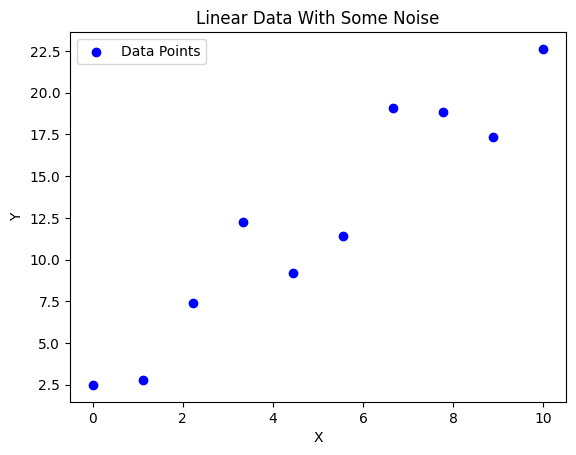

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate 10 data points from a linear model with noise
x = np.linspace(0, 10, 10)
y = 2 * x + 1 + np.random.normal(0, 3, size=x.shape)  # y = 2x + 1 + noise

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Adding title and labels
plt.title('Linear Data With Some Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

Now, let's generate a linear model to fit this  data, and plot that model with the data:

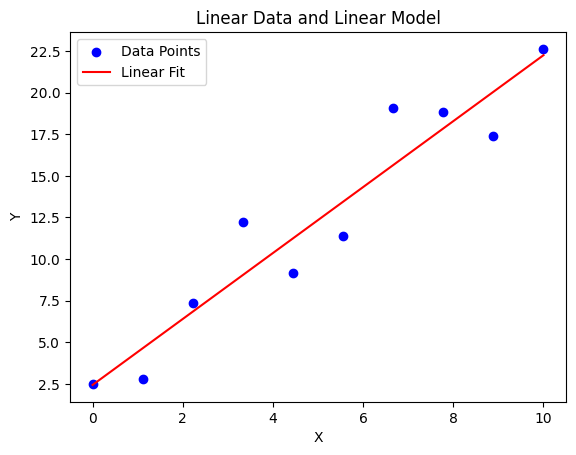

In [ ]:
# Fit a linear model
linear_model = LinearRegression()
linear_model.fit(x.reshape(-1, 1), y) # We reshape this from a one-dimensional array to a two-dimensional array with only one column, because that's what the linear model function expects.
y_linear_pred = linear_model.predict(x.reshape(-1, 1))

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear fit
plt.plot(x, y_linear_pred, color='red', label='Linear Fit')

# Adding title and labels
plt.title('Linear Data and Linear Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

That fit looks pretty good, and it's using a simple model with only two parameters.

Can we do better? Well, we can try. Let's fit this instead with a 3rd degree polynomial (called a *cubic* polynomial).

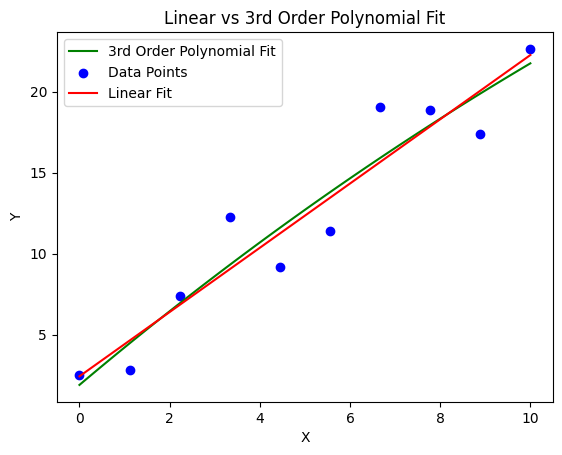

In [ ]:
# Fit a 3rd order polynomial model
poly3_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3_model.fit(x.reshape(-1, 1), y)
y_poly3_pred = poly3_model.predict(x.reshape(-1, 1))


# Generate data for plotting the polynomial curve so it looks smoother
x_plot = np.linspace(0, 10, 100)
y_poly3_plot = poly3_model.predict(x_plot.reshape(-1, 1))

# Plot the 3rd order polynomial fit
plt.plot(x_plot, y_poly3_plot, color='green', label='3rd Order Polynomial Fit')

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear fit
plt.plot(x, y_linear_pred, color='red', label='Linear Fit')

# Adding title and labels
plt.title('Linear vs 3rd Order Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

Does that cubic polynomial fit the data better than the linear polynomial? Maybe. It gets a bit closer to the data points. Let's see if we can do better by increasing the degree of the polynomial even more. This time, we'll try a 6th degree polynomial.

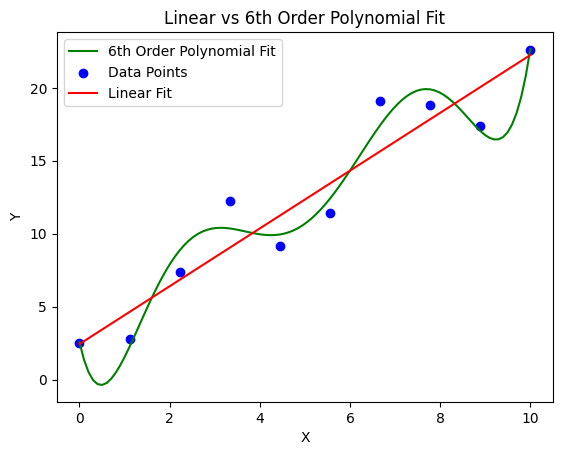

In [ ]:
# Fit a 6th order polynomial model
poly6_model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
poly6_model.fit(x.reshape(-1, 1), y)
y_poly6_pred = poly6_model.predict(x.reshape(-1, 1))


# Generate the smooth plot of the polynomial curve
y_poly6_plot = poly6_model.predict(x_plot.reshape(-1, 1))

# Plot the 6th order polynomial fit
plt.plot(x_plot, y_poly6_plot, color='green', label='6th Order Polynomial Fit')

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear fit
plt.plot(x, y_linear_pred, color='red', label='Linear Fit')

# Adding title and labels
plt.title('Linear vs 6th Order Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

Look at that! It's now getting much closer to our data Maybe there's more where that came from. Let's create a 9th order polynomial model and fit that to the data.

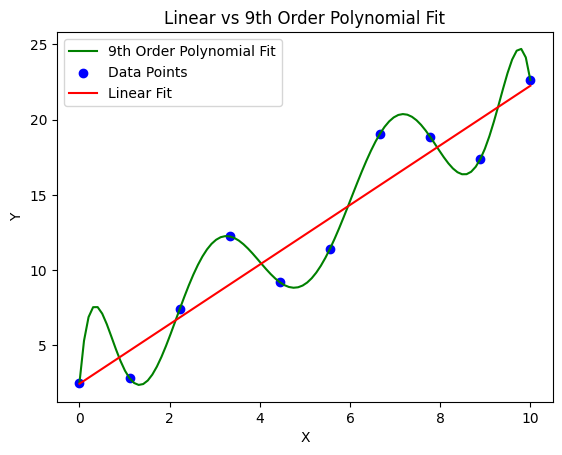

In [ ]:
# Fit a 9th order polynomial model
poly9_model = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())
poly9_model.fit(x.reshape(-1, 1), y)
y_poly9_pred = poly9_model.predict(x.reshape(-1, 1))


# Generate the smooth plot of the polynomial curve
y_poly9_plot = poly9_model.predict(x_plot.reshape(-1, 1))

# Plot the 9th order polynomial fit
plt.plot(x_plot, y_poly9_plot, color='green', label='9th Order Polynomial Fit')

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear fit
plt.plot(x, y_linear_pred, color='red', label='Linear Fit')

# Adding title and labels
plt.title('Linear vs 9th Order Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

A perfect fit! Nailed it.

Would you trust this model? I wouldn't. Yes, it manages to go through every data point perfectly (an $n$th degree polynomial model will always go through $n+1$ points perfectly), but it's very unlikely to do well on additional data.

Let's take a look at all our models:

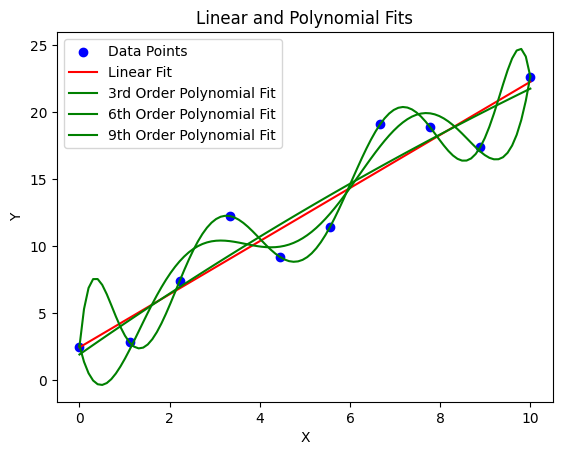

In [ ]:
# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear fit
plt.plot(x, y_linear_pred, color='red', label='Linear Fit')

# Plot the 3rd order polynomial fit
plt.plot(x_plot, y_poly3_plot, color='green', label='3rd Order Polynomial Fit')

# Plot the 6th order polynomial fit
plt.plot(x_plot, y_poly6_plot, color='green', label='6th Order Polynomial Fit')

# Plot the 9th order polynomial fit
plt.plot(x_plot, y_poly9_plot, color='green', label='9th Order Polynomial Fit')

# Adding title and labels
plt.title('Linear and Polynomial Fits')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

Now, let's generate some more random data in that same interval, and see how our models do.

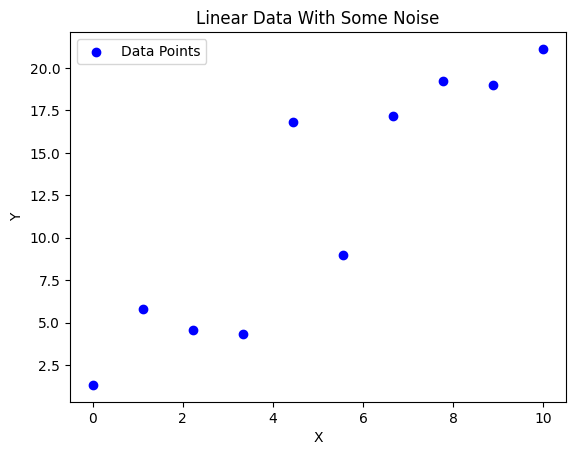

In [ ]:
# Set the random seed for reproducibility
np.random.seed(6600)

# Generate 10 data points from a linear model with noise
x_new = np.linspace(0, 10, 10)
y_new = 2 * x_new + 1 + np.random.normal(0, 3, size=x.shape)  # y = 2x + 1 + noise

# Plot the new data points
plt.scatter(x_new, y_new, color='blue', label='Data Points')

# Adding title and labels
plt.title('Linear Data With Some Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

Now let's see how our models trained on our original dataset do with this new data:

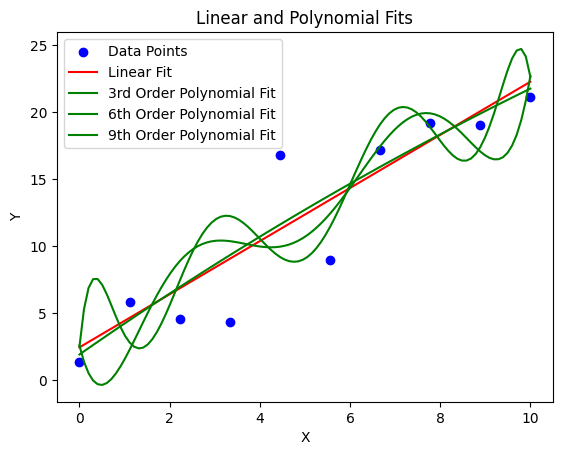

In [ ]:
# Plot the new data points
plt.scatter(x_new, y_new, color='blue', label='Data Points')

# Plot the linear fit
plt.plot(x, y_linear_pred, color='red', label='Linear Fit')

# Plot the 3rd order polynomial fit
plt.plot(x_plot, y_poly3_plot, color='green', label='3rd Order Polynomial Fit')

# Plot the 6th order polynomial fit
plt.plot(x_plot, y_poly6_plot, color='green', label='6th Order Polynomial Fit')

# Plot the 9th order polynomial fit
plt.plot(x_plot, y_poly9_plot, color='green', label='9th Order Polynomial Fit')

# Adding title and labels
plt.title('Linear and Polynomial Fits')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

Not great, and it gets even worse if we add on some data outside our original range. Let's add on an $x$-value of $11$.

In [ ]:
x = np.append(x,11)
y = np.append(y,2 * 11 + 1 + np.random.normal(0, 3))

Let's see how our models handle this new data point.

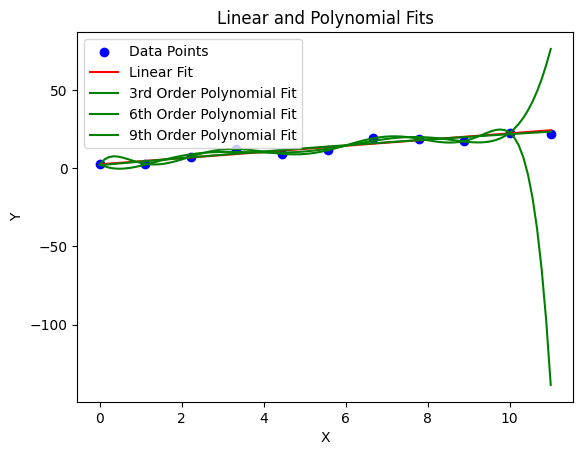

In [ ]:
y_linear_pred = linear_model.predict(x.reshape(-1, 1))

x_plot = np.linspace(0, 11, 100)
y_poly3_plot = poly3_model.predict(x_plot.reshape(-1, 1))
y_poly6_plot = poly6_model.predict(x_plot.reshape(-1, 1))
y_poly9_plot = poly9_model.predict(x_plot.reshape(-1, 1))

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear fit
plt.plot(x, y_linear_pred, color='red', label='Linear Fit')

# Plot the 3rd order polynomial fit
plt.plot(x_plot, y_poly3_plot, color='green', label='3rd Order Polynomial Fit')

# Plot the 6th order polynomial fit
plt.plot(x_plot, y_poly6_plot, color='green', label='6th Order Polynomial Fit')

# Plot the 9th order polynomial fit
plt.plot(x_plot, y_poly9_plot, color='green', label='9th Order Polynomial Fit')

# Adding title and labels
plt.title('Linear and Polynomial Fits')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

Whoa! The higher degree polynomials totally break. Probably not the model we need.

Now, these may seem silly, but you'll actually [sometimes encounter](https://www.washingtonpost.com/politics/2021/04/12/how-people-who-should-know-better-abuse-math-bolster-election-fraud-lie/) models like this.

The higher degree polynomial models have overfit the data. They have more parameters than the linear model, and so are able to tweak those parameters to account for the noise in the training data, but that noise in the training data isn't what we want to model, as it doesn't help us make predictions about data we haven't seen before.

Constraining a model to make it simpler and reduce the risk of overfitting is called *regularization*. Sometimes this is done by decreasing the number of parameters, and sometimes this is done by constraining the values the parameters can have.

Typically, the amount of regularization applied during training is controlled by a *hyperparameter*, which is a parameter of the learning algorithm that is set before training, and not learned during training. How we find the right hyperparameters - in other words how we *tune* the hyperparameters, is an important part of machine learning which we'll discuss in more detail in our next lecture.

### The Bias-Variance Tradeoff

How much your model is prone to change when you change the training data is called the model's *variance*. A model with a high variance is more prone to overfitting. Regularization tends to decrease the variance of a model, but does so by introducing *bias*. A biased model is one that is less likely to give you exactly the right answer.

It's a mathematical proof beyond the scope of this class that there's an inherent bias-variance tradeoff for any model. By decreasing the variance, you invariably increase the bias, and vice-versa. A completely unbiased model (one that's most likely to give you the correct answer) will also have the highest variance (if it misses, it's more likely to miss big).